In [1]:
import pandas as pd
df1=pd.read_csv("Customers.csv")
df2=pd.read_csv("Transactions.csv")

In [3]:
merged_data=df2.merge(df1, on='CustomerID')
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00761,C0199,P022,2024-10-01 05:57:09,4,550.16,137.54,Andrea Jenkins,Europe,2022-12-03
2,T00626,C0199,P079,2024-08-17 12:06:08,2,834.74,417.37,Andrea Jenkins,Europe,2022-12-03
3,T00963,C0199,P008,2024-10-26 00:01:58,2,293.70,146.85,Andrea Jenkins,Europe,2022-12-03
4,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
...,...,...,...,...,...,...,...,...,...,...
995,T00774,C0095,P056,2024-01-07 14:19:49,2,32.16,16.08,William Walker,South America,2023-03-04
996,T00823,C0095,P079,2024-09-30 10:45:06,3,1252.11,417.37,William Walker,South America,2023-03-04
997,T00369,C0151,P082,2024-12-24 11:40:24,4,223.96,55.99,Amber Gonzalez,South America,2024-11-22
998,T00809,C0078,P075,2024-12-09 11:44:44,2,995.52,497.76,Julia Palmer,Asia,2024-11-13


In [4]:
merged_data.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
CustomerName       0
Region             0
SignupDate         0
dtype: int64

In [5]:
merged_data.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
CustomerName        object
Region              object
SignupDate          object
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
categorical_columns = ['TransactionID', 'CustomerID', 'ProductID', 'CustomerName', 'Region']

for col in categorical_columns:
    merged_data[col] = le.fit_transform(merged_data[col])



In [9]:

merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])

In [11]:
merged_data.dtypes

TransactionID               int32
CustomerID                  int32
ProductID                   int32
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
CustomerName                int32
Region                      int32
SignupDate         datetime64[ns]
dtype: object

In [13]:
merged_data['TransactionYear'] = merged_data['TransactionDate'].dt.year
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.month
merged_data['TransactionDay'] = merged_data['TransactionDate'].dt.day
merged_data['TransactionHour'] = merged_data['TransactionDate'].dt.hour
merged_data['TransactionMinute'] = merged_data['TransactionDate'].dt.minute
merged_data['TransactionWeekday'] = merged_data['TransactionDate'].dt.weekday  # Monday=0, Sunday=6

merged_data['SignupYear'] = merged_data['SignupDate'].dt.year
merged_data['SignupMonth'] = merged_data['SignupDate'].dt.month
merged_data['SignupDay'] = merged_data['SignupDate'].dt.day
merged_data['SignupHour'] = merged_data['SignupDate'].dt.hour
merged_data['SignupMinute'] = merged_data['SignupDate'].dt.minute
merged_data['SignupWeekday'] = merged_data['SignupDate'].dt.weekday

In [15]:
merged_data = merged_data.drop(['TransactionDate', 'SignupDate'], axis=1)


In [16]:
merged_data.dtypes

TransactionID           int32
CustomerID              int32
ProductID               int32
Quantity                int64
TotalValue            float64
Price                 float64
CustomerName            int32
Region                  int32
TransactionYear         int32
TransactionMonth        int32
TransactionDay          int32
TransactionHour         int32
TransactionMinute       int32
TransactionWeekday      int32
SignupYear              int32
SignupMonth             int32
SignupDay               int32
SignupHour              int32
SignupMinute            int32
SignupWeekday           int32
dtype: object

In [17]:
merged_data

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price,CustomerName,Region,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionWeekday,SignupYear,SignupMonth,SignupDay,SignupHour,SignupMinute,SignupWeekday
0,0,197,66,1,300.68,300.68,10,1,2024,8,25,12,38,6,2022,12,3,0,0,5
1,760,197,21,4,550.16,137.54,10,1,2024,10,1,5,57,1,2022,12,3,0,0,5
2,625,197,78,2,834.74,417.37,10,1,2024,8,17,12,6,5,2022,12,3,0,0,5
3,962,197,7,2,293.70,146.85,10,1,2024,10,26,0,1,5,2022,12,3,0,0,5
4,111,145,66,1,300.68,300.68,27,0,2024,5,27,22,23,0,2024,9,4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,773,94,55,2,32.16,16.08,197,3,2024,1,7,14,19,6,2023,3,4,0,0,5
996,822,94,78,3,1252.11,417.37,197,3,2024,9,30,10,45,0,2023,3,4,0,0,5
997,368,150,81,4,223.96,55.99,8,3,2024,12,24,11,40,1,2024,11,22,0,0,4
998,808,77,74,2,995.52,497.76,96,0,2024,12,9,11,44,0,2024,11,13,0,0,2


In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
merged_data=sc.fit_transform(merged_data)

In [19]:
merged_data

array([[-1.73031962,  1.69367454,  0.59277991, ...,  0.        ,
         0.        ,  0.92826147],
       [ 0.90239892,  1.69367454, -1.03117577, ...,  0.        ,
         0.        ,  0.92826147],
       [ 0.43474497,  1.69367454,  1.02583476, ...,  0.        ,
         0.        ,  0.92826147],
       ...,
       [-0.45552959,  0.87140052,  1.13409847, ...,  0.        ,
         0.        ,  0.43763701],
       [ 1.06867588, -0.40574849,  0.88148314, ...,  0.        ,
         0.        , -0.54361189],
       [ 0.09179874,  0.15409765, -0.81464834, ...,  0.        ,
         0.        ,  0.92826147]])

In [21]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_clustering.fit(merged_data)
labels = agg_clustering.labels_

In [25]:
labels

array([2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,

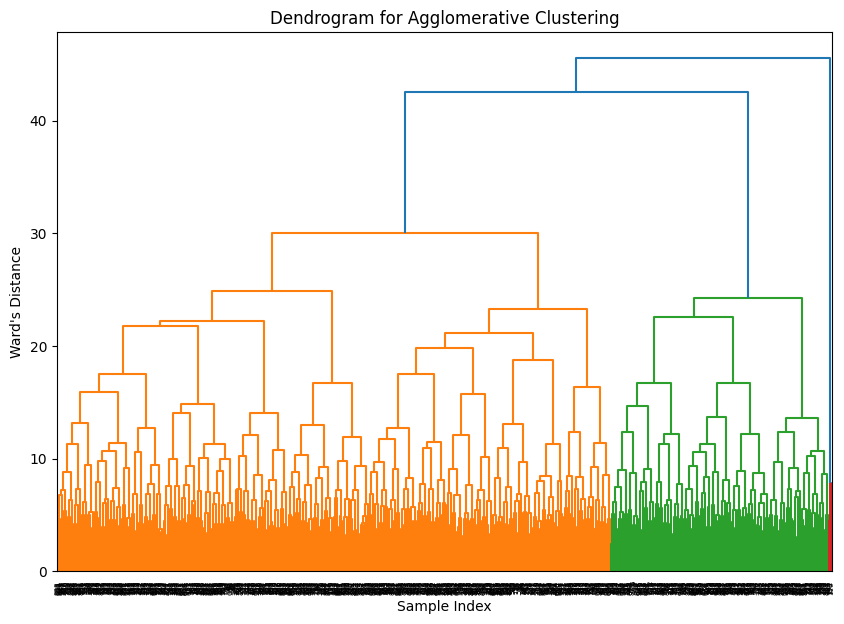

In [27]:
linked = linkage(merged_data, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Ward\'s Distance')
plt.show()

In [30]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
silhouette_avg = silhouette_score(merged_data, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.060618350920285065


In [31]:
calinski_score = calinski_harabasz_score(merged_data, labels)
print(f"Calinski-Harabasz Index: {calinski_score}")


Calinski-Harabasz Index: 60.33535014313284


In [32]:
davies_bouldin_score_value = davies_bouldin_score(merged_data, labels)
print(f"Davies-Bouldin Index: {davies_bouldin_score_value}")

Davies-Bouldin Index: 2.652375556462404
